In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### Doing the EDA

In [41]:
data = pd.read_csv('Crop_Prediction_Dataset.csv')
df = data.copy()
df.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,7000,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Andaman and Nicobar,120000,Rice


In [42]:
df.drop(columns=['CROP_PRICE', 'STATE'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N_SOIL       2200 non-null   int64  
 1   P_SOIL       2200 non-null   int64  
 2   K_SOIL       2200 non-null   int64  
 3   TEMPERATURE  2200 non-null   float64
 4   HUMIDITY     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   RAINFALL     2200 non-null   float64
 7   CROP         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [43]:
df.describe()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


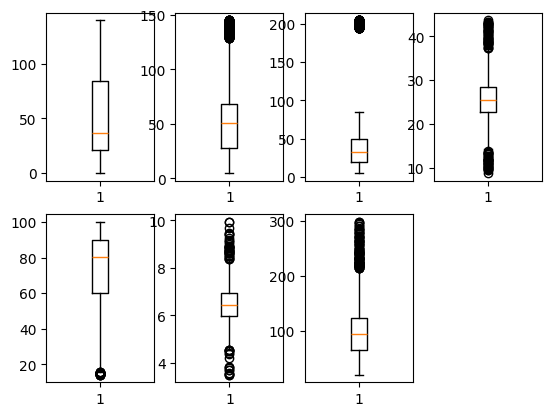

In [44]:
plt.Figure(figsize=(10,5))

plt.subplot(2,4,1)
plt.boxplot(df['N_SOIL'])

plt.subplot(2,4,2)
plt.boxplot(df['P_SOIL'])

plt.subplot(2,4,3)
plt.boxplot(df['K_SOIL'])

plt.subplot(2,4,4)
plt.boxplot(df['TEMPERATURE'])

plt.subplot(2,4,5)
plt.boxplot(df['HUMIDITY'])

plt.subplot(2,4,6)
plt.boxplot(df['ph'])

plt.subplot(2,4,7)
plt.boxplot(df['RAINFALL'])

plt.show()

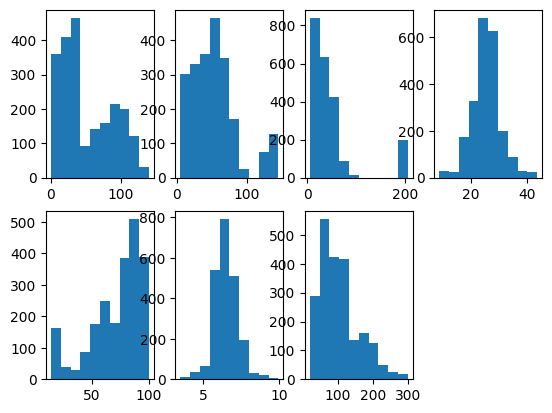

In [45]:
plt.Figure(figsize=(10,5))

plt.subplot(2,4,1)
plt.hist(df['N_SOIL'])

plt.subplot(2,4,2)
plt.hist(df['P_SOIL'])

plt.subplot(2,4,3)
plt.hist(df['K_SOIL'])

plt.subplot(2,4,4)
plt.hist(df['TEMPERATURE'])

plt.subplot(2,4,5)
plt.hist(df['HUMIDITY'])

plt.subplot(2,4,6)
plt.hist(df['ph'])

plt.subplot(2,4,7)
plt.hist(df['RAINFALL'])

plt.show()

In [51]:
scaler = RobustScaler()

X = df.drop(columns=['CROP'])
y = df['CROP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [53]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.99

Classification Report:
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        23
      Banana       1.00      1.00      1.00        21
   Blackgram       0.95      1.00      0.98        20
    ChickPea       1.00      1.00      1.00        26
     Coconut       0.96      1.00      0.98        27
      Coffee       1.00      1.00      1.00        17
      Cotton       1.00      1.00      1.00        17
      Grapes       1.00      1.00      1.00        14
        Jute       0.92      0.96      0.94        23
 KidneyBeans       1.00      1.00      1.00        20
      Lentil       0.92      1.00      0.96        11
       Maize       1.00      0.95      0.98        21
       Mango       1.00      1.00      1.00        19
   MothBeans       1.00      0.92      0.96        24
    MungBean       1.00      1.00      1.00        19
   Muskmelon       1.00      1.00      1.00        17
      Orange       1.00      1.00      1.0

In [55]:
model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [56]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.99

Classification Report:
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        23
      Banana       1.00      1.00      1.00        21
   Blackgram       0.95      1.00      0.98        20
    ChickPea       1.00      1.00      1.00        26
     Coconut       0.96      1.00      0.98        27
      Coffee       1.00      1.00      1.00        17
      Cotton       1.00      1.00      1.00        17
      Grapes       1.00      1.00      1.00        14
        Jute       0.92      0.96      0.94        23
 KidneyBeans       1.00      1.00      1.00        20
      Lentil       0.92      1.00      0.96        11
       Maize       1.00      0.95      0.98        21
       Mango       1.00      1.00      1.00        19
   MothBeans       1.00      0.92      0.96        24
    MungBean       1.00      1.00      1.00        19
   Muskmelon       1.00      1.00      1.00        17
      Orange       1.00      1.00      1.0